# CTGAN, introduction

## Step 1: Prepare your data

In [1]:
import sys
sys.path.append('/Users/khosseini/myJobs/ATI/Projects/2019/QUIPP/CTGAN')

In [2]:
from ctgan.data import read_csv

In [3]:
data, discrete_columns = read_csv(csv_filename="/Users/khosseini/myJobs/ATI/Projects/2019/QUIPP/CTGAN/examples/csv/adult.csv", 
                                  meta_filename="/Users/khosseini/myJobs/ATI/Projects/2019/QUIPP/CTGAN/examples/csv/adult.json")

The Metadata file will be in JSON format, containing an entry called columns, with a list of sub-documents containing both the name of the column and its type.

**Column types can be continuous for continuous columns and categorical, ordinal or discrete for non-continuous columns.**

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
discrete_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

## Step 2: Fit CTGAN to your data

In [6]:
from ctgan.synthesizer import CTGANSynthesizer

In [7]:
ctgan = CTGANSynthesizer()

In [8]:
ctgan

In [9]:
ctgan.fit(data, discrete_columns, epochs=20)

Epoch 1, Loss G: 1.5188, Loss D: -0.0014
Epoch 2, Loss G: 1.0563, Loss D: 0.1507
Epoch 3, Loss G: 0.7653, Loss D: -0.1062
Epoch 4, Loss G: 0.1909, Loss D: 0.3226
Epoch 5, Loss G: -0.1355, Loss D: 0.0876
Epoch 6, Loss G: -0.5942, Loss D: -0.0098
Epoch 7, Loss G: -1.1413, Loss D: -0.0877
Epoch 8, Loss G: -0.9916, Loss D: 0.1304
Epoch 9, Loss G: -1.4179, Loss D: 0.1865
Epoch 10, Loss G: -1.4387, Loss D: -0.0136
Epoch 11, Loss G: -1.3649, Loss D: -0.0298
Epoch 12, Loss G: -1.5131, Loss D: -0.1798
Epoch 13, Loss G: -1.5675, Loss D: -0.2320
Epoch 14, Loss G: -1.4593, Loss D: -0.1378
Epoch 15, Loss G: -1.4129, Loss D: -0.4808
Epoch 16, Loss G: -1.1581, Loss D: -0.0766
Epoch 17, Loss G: -1.3571, Loss D: -0.2240
Epoch 18, Loss G: -1.0995, Loss D: -0.0240
Epoch 19, Loss G: -0.4985, Loss D: -0.1542
Epoch 20, Loss G: -0.3513, Loss D: 0.0322


Once the process has finished, all you need to do is call the sample method of your CTGANSynthesizer instance indicating the number of rows that you want to generate.

In [10]:
samples = ctgan.sample(10000)

In [11]:
samples

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,53.0103,Private,257956,HS-grad,7.19659,Separated,Exec-managerial,Husband,White,Male,-67.0383,3.58853,39.9778,United-States,<=50K
1,39.8692,Private,48078.2,Some-college,10.0205,Separated,Exec-managerial,Not-in-family,White,Female,-42.5131,2.981,19.6381,United-States,<=50K
2,23.4447,Private,57357.6,HS-grad,9.9486,Separated,Prof-specialty,Husband,White,Female,-103.952,-0.581769,28.4289,United-States,<=50K
3,21.1829,Private,280769,10th,10.0184,Never-married,Adm-clerical,Unmarried,Black,Female,-83.0708,2.83961,39.8866,England,<=50K
4,28.7706,Self-emp-not-inc,125127,Bachelors,5.44638,Never-married,Tech-support,Own-child,Black,Female,36.4319,2.41465,39.999,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44.6905,Private,182222,10th,10.0148,Divorced,Adm-clerical,Not-in-family,White,Male,19.0182,-5.16988,40.1239,France,<=50K
9996,46.8684,Private,160805,Bachelors,13.0373,Married-civ-spouse,Exec-managerial,Husband,White,Male,-74.7545,4.24688,23.7954,?,>50K
9997,23.9573,Private,534410,Doctorate,13.0158,Married-civ-spouse,Farming-fishing,Husband,White,Male,-50.8112,3.84867,39.8616,United-States,>50K
9998,26.2956,Private,120385,Bachelors,5.60982,Never-married,Exec-managerial,Not-in-family,Asian-Pac-Islander,Female,-43.2806,0.776625,11.5117,United-States,<=50K


NOTE: CTGAN does not distinguish between float and integer columns, which means that it will sample float values in all cases. If integer values are required, the outputted float values must be rounded to integers in a later step, outside of CTGAN.

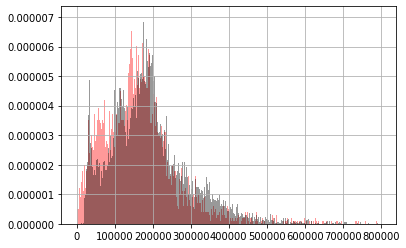

In [13]:
samples['fnlwgt'].hist(density=True, alpha=0.4, bins=range(0, 800001, 1000), color='r')
data['fnlwgt'].hist(density=True, alpha=0.4, bins=range(0, 800001, 1000), color='k')